# Stroke prediction

### Importing libraries

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [249]:
df=pd.read_csv('stroke_dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data wrangling

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [251]:
df.drop('id', axis=1, inplace=True)

In [252]:
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [253]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [254]:
df.shape

(5110, 11)

In [255]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [256]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [257]:
# replacing null values with median values
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [258]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [259]:
df.duplicated().sum()

0

## EDA & Visualization

In [260]:
print(df['stroke'].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


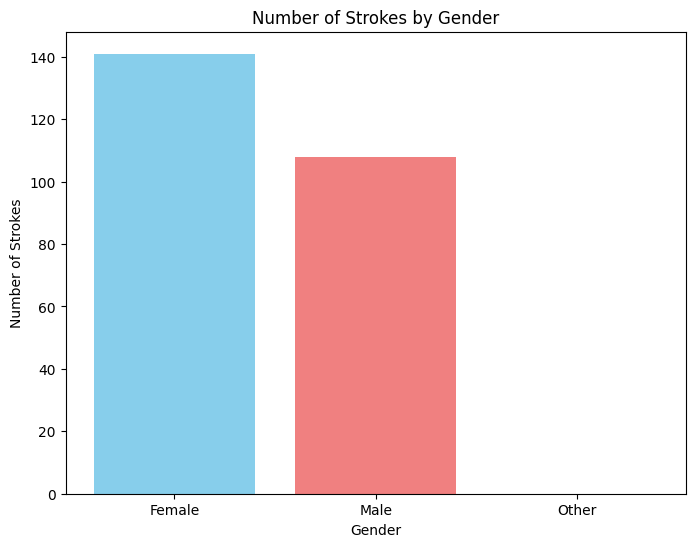

In [261]:
gender_stroke_counts = df.groupby('gender')['stroke'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(gender_stroke_counts['gender'], gender_stroke_counts['stroke'], color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Number of Strokes')
plt.title('Number of Strokes by Gender')
plt.show()

- females recorded more stroke cases than males and others

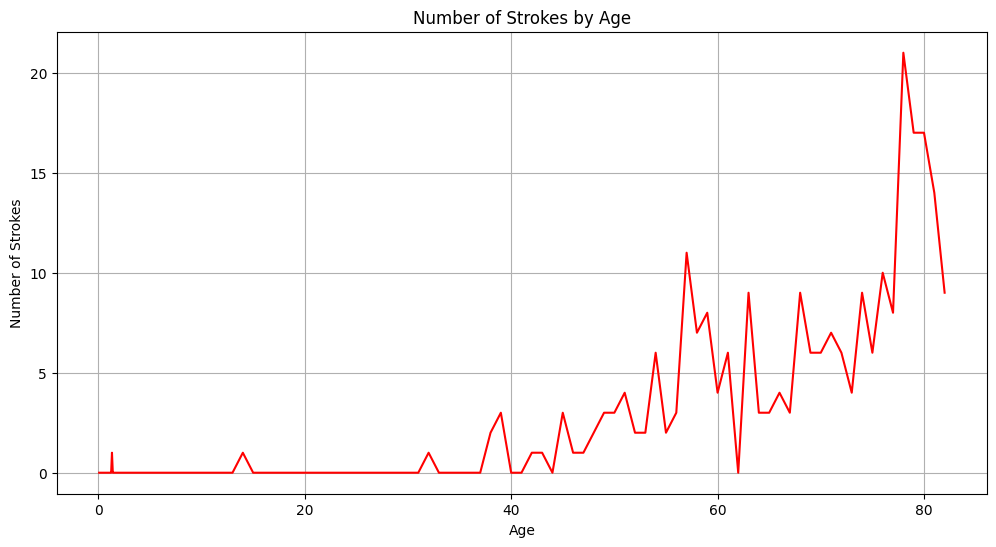

In [262]:
# Grouping data by age and summing the strokes
age_stroke_counts = df.groupby('age')['stroke'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(age_stroke_counts['age'], age_stroke_counts['stroke'], linestyle='-', color='r')
plt.xlabel('Age')
plt.ylabel('Number of Strokes')
plt.title('Number of Strokes by Age')
plt.grid(True)
plt.show()

- stroke rate have a gradual increase after 50 years og old

<Figure size 3500x2000 with 0 Axes>

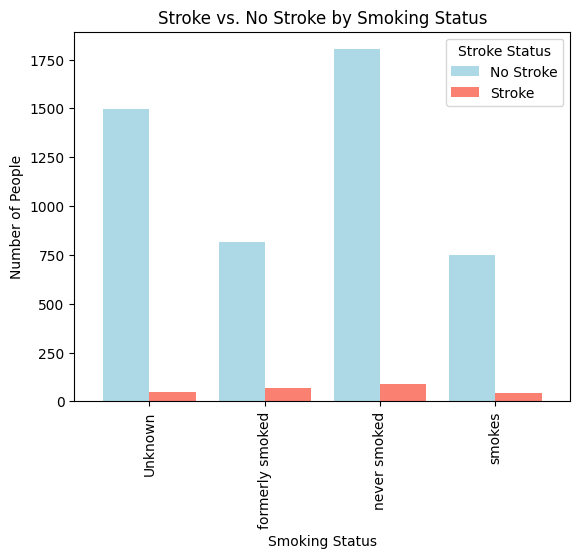

In [263]:
# Grouping by smoking status and stroke, then counting occurrences
smoking_stroke_counts = df.groupby(['smoking_status', 'stroke']).size().unstack().reset_index()

# Rename the columns for clarity
smoking_stroke_counts.columns = ['smoking_status', 'No Stroke', 'Stroke']

# Plotting
plt.figure(figsize=(35, 20))
smoking_stroke_counts.set_index('smoking_status').plot(kind='bar', stacked=False, color=['lightblue', 'salmon'], width=0.8)
plt.xlabel('Smoking Status')
plt.ylabel('Number of People')
plt.title('Stroke vs. No Stroke by Smoking Status')
plt.legend(title='Stroke Status')

plt.show()

- non smokers have hight count for both no stroke and stroke
- smokers recorded less strokes but the count of data is also low
- maybe a percentage wise data would be more helpfull

In [264]:
smoking_status_counts = df['smoking_status'].value_counts()
smoking_status_counts

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [265]:
stroke_data = df[df['stroke'] == 1]
smoking_status_with_stroke_counts = stroke_data['smoking_status'].value_counts()
smoking_status_with_stroke_counts

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

In [266]:
percentage_of_stokes_in_never_smoked = 90*100/1892
percentage_of_stokes_in_never_smoked

4.7568710359408035

In [267]:
percentage_of_stokes_in_Unknown = 47*100/1544
percentage_of_stokes_in_Unknown

3.0440414507772022

In [268]:
percentage_of_stokes_in_formerly_smoked = 70*100/885
percentage_of_stokes_in_formerly_smoked

7.909604519774011

In [269]:
percentage_of_stokes_in_smokes = 42*100/789
percentage_of_stokes_in_smokes

5.32319391634981

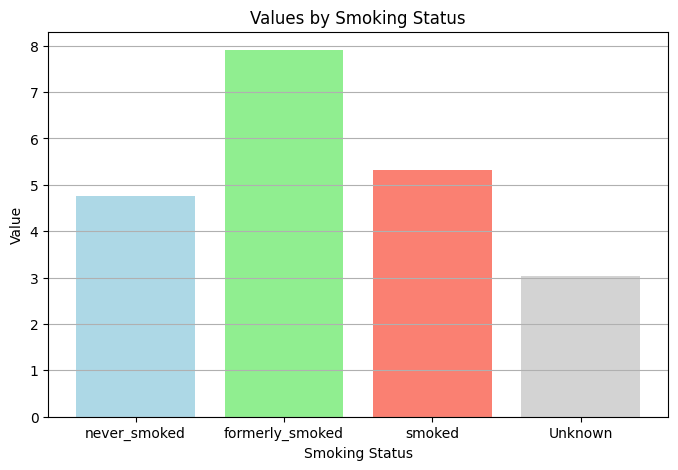

In [270]:
categories = ['never_smoked', 'formerly_smoked', 'smoked', 'Unknown']
values = [4.76, 7.91, 5.32, 3.04]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['lightblue', 'lightgreen', 'salmon', 'lightgrey'])
plt.xlabel('Smoking Status')
plt.ylabel('Value')
plt.title('Values by Smoking Status')
plt.grid(axis='y')

plt.show()

- formaly smoked reported more stroke cases for 100 people
- never smoked have lowest because we dont have data on unknown

## Model Building

#### Converting categorical to nuemeric values

In [271]:
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

In [272]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,61.0,0,0,1,1,0,202.21,28.1,1,1
2,1,80.0,0,1,1,0,0,105.92,32.5,1,1


- all converted into numeric values

<Axes: >

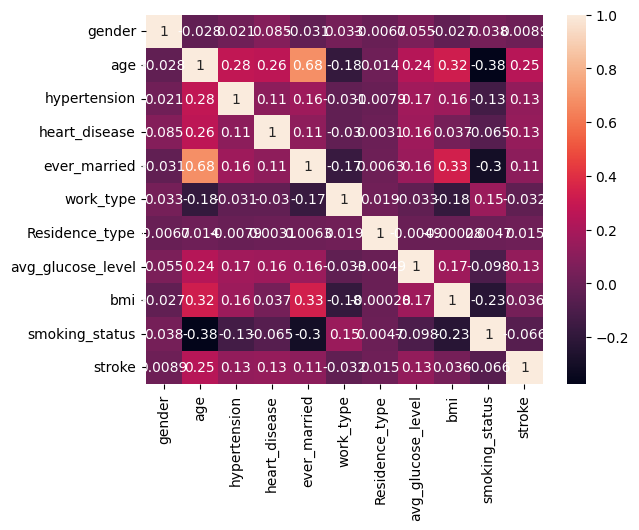

In [273]:
sns.heatmap(df.corr(), annot=True)

### Logistic Regression

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [275]:
# Define features and target
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'ever_married', 'gender', 'Residence_type', 'smoking_status', 'work_type']]
y = df['stroke']

In [276]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [278]:
lr_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, lr_pred)
conf_matrix = confusion_matrix(y_test, lr_pred)
class_report = classification_report(y_test, lr_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9393346379647749
Confusion Matrix:
 [[960   0]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC AUC Score: 0.8496975806451613


- The model showing an accuracy of 93 percent.

### Decision Tree Classifier

In [279]:
from sklearn.tree import DecisionTreeClassifier

In [280]:
# Initialize and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [281]:
# Make predictions
dt_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
conf_matrix = confusion_matrix(y_test, dt_pred)
class_report = classification_report(y_test, dt_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.913894324853229
Confusion Matrix:
 [[924  36]
 [ 52  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.22      0.16      0.19        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022

ROC AUC Score: 0.5618951612903227


### KNN Classification

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [284]:
knn_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
conf_matrix = confusion_matrix(y_test, knn_pred)
class_report = classification_report(y_test, knn_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9354207436399217
Confusion Matrix:
 [[954   6]
 [ 60   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.25      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.60      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022

ROC AUC Score: 0.6853578629032258


- All the models showing high level of accuracy. So lets build a model comparison

In [285]:
# Define models and their accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'KNN']
accuracy = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, knn_pred)]

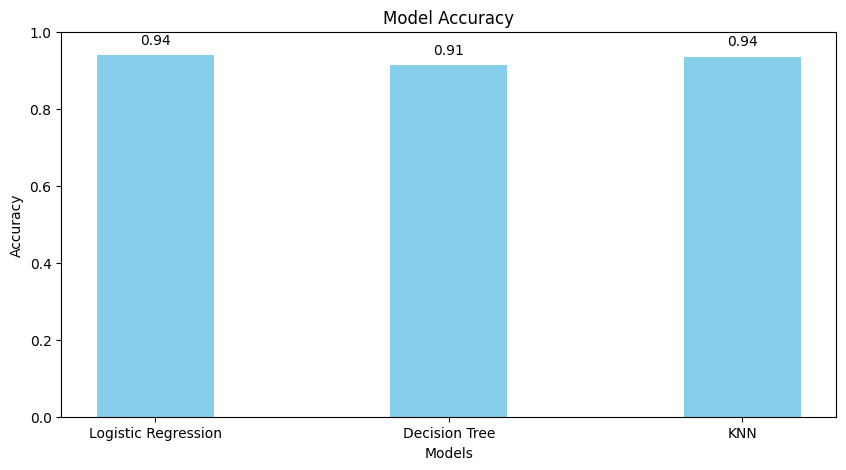

In [286]:
plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracy, color='Skyblue', width=0.4)

# Adding accuracy scores as text labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0, 
        height + 0.02,  
        f'{height:.2f}',  
        ha='center',  
        va='bottom'  
    )

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1) 
plt.show()

## Conclusion

- females recorded more stroke cases than males and others
- stroke rate have a gradual increase after 50 years og old
- formaly smoked reported more stroke cases for 100 people- 
never smoked have lowest because we dont have data on unknow
- In the model building phase all the models showed high accuracy with logistic regression and KNN with 94 percent.
ll